## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
import tensorflow as tf

In [3]:
print (tf.__version__)

2.0.0


In [69]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [70]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [71]:
# Import the Resnet-50 library as shown below and add preprocessing layer to the front of resnet-50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [72]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [73]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [74]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [75]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [76]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [77]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object 
model = Model(inputs=resnet.input, outputs=prediction)

In [78]:

# view the structure of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [80]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [81]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    brightness_range=(0.2, 0.7),
                                   shear_range=45.0,
#                                    zoom_range=60.0,
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40, 
                                  width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   brightness_range=(0.2, 0.7),
                                  shear_range=45.0,
#                                   zoom_range=60.0,
                                  horizontal_flip=True,
                                  vertical_flip=True)

In [82]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 269 images belonging to 3 classes.


In [83]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 96 images belonging to 3 classes.


In [86]:
# fit the model
# Run the cell. It will take some time to execute
batch_size = 32
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
   steps_per_epoch= 200//batch_size,
   validation_steps = 400//batch_size
)

Epoch 1/5
6/6 [==============================] - 161s 27s/step - loss: 5.1942 - accuracy: 0.6301 - val_loss: 2.2204 - val_accuracy: 0.2292
Epoch 2/5
6/6 [==============================] - 174s 29s/step - loss: 4.4687 - accuracy: 0.6250 - val_loss: 7.0095 - val_accuracy: 0.3438
Epoch 3/5
6/6 [==============================] - 168s 28s/step - loss: 3.4904 - accuracy: 0.7630 - val_loss: 4.8294 - val_accuracy: 0.3177
Epoch 4/5
6/6 [==============================] - 203s 34s/step - loss: 3.4512 - accuracy: 0.7399 - val_loss: 6.9673 - val_accuracy: 0.3359
Epoch 5/5
6/6 [==============================] - 205s 34s/step - loss: 2.7656 - accuracy: 0.7969 - val_loss: 4.2907 - val_accuracy: 0.2552


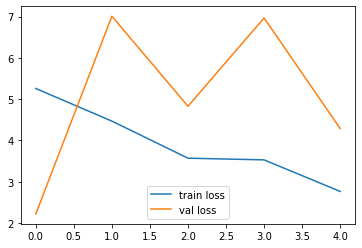

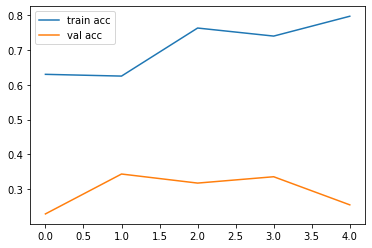

<Figure size 432x288 with 0 Axes>

In [87]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [25]:

y_pred = model.predict(test_set)


In [26]:
y_pred

array([[2.73187868e-02, 6.35943949e-01, 3.36737245e-01],
       [5.32117963e-01, 4.06336963e-01, 6.15450703e-02],
       [2.18244940e-01, 1.21792853e-01, 6.59962177e-01],
       [7.13846564e-01, 6.96882829e-02, 2.16465190e-01],
       [8.45080912e-02, 1.32538576e-03, 9.14166570e-01],
       [1.12954237e-01, 8.64453554e-01, 2.25921888e-02],
       [5.32363169e-02, 7.21089959e-01, 2.25673750e-01],
       [2.26125740e-05, 8.14217638e-05, 9.99895930e-01],
       [4.68579568e-02, 9.51322854e-01, 1.81910372e-03],
       [2.18738019e-02, 1.25456427e-03, 9.76871669e-01],
       [4.89251651e-02, 8.53239179e-01, 9.78356451e-02],
       [3.28370333e-02, 2.36797822e-03, 9.64794993e-01],
       [8.04440752e-02, 2.88622886e-01, 6.30933046e-01],
       [3.90192628e-01, 2.33580455e-01, 3.76226962e-01],
       [1.83415916e-02, 9.48268533e-01, 3.33898999e-02],
       [2.41261408e-01, 4.27105606e-01, 3.31632912e-01],
       [8.70700061e-01, 3.90547724e-03, 1.25394493e-01],
       [6.43375870e-06, 4.48106

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1], dtype=int64)

In [36]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [93]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [94]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [95]:
x.shape

(224, 224, 3)

In [96]:
x=x/255

In [97]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [98]:
model.predict(img_data)

array([[0.02122196, 0.49325418, 0.4855238 ]], dtype=float32)

In [100]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])